In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import spacy

### Etudier la répartition des textes par émotions

In [17]:
df = pd.read_csv('Emotion_final.csv')

In [18]:
emotion_counts = df['Emotion'].value_counts()
emotion_counts

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

Text(0, 0.5, 'Nombre de textes')

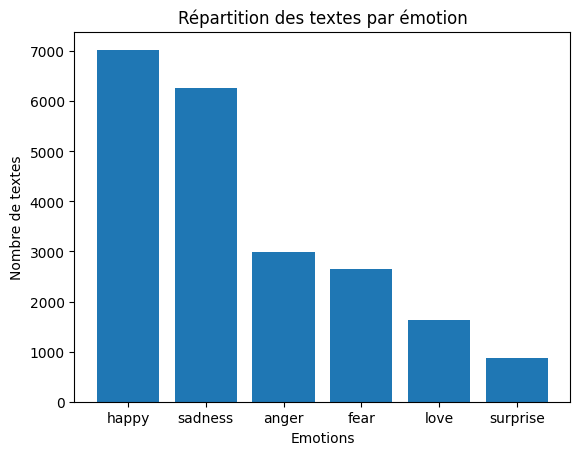

In [19]:
plt.bar(emotion_counts.index,emotion_counts.values)
plt.title('Répartition des textes par émotion')
plt.xlabel('Emotions')
plt.ylabel('Nombre de textes')

### identifiez quels mots sont susceptibles d'être des stopword

In [20]:
import spacy

# Charger le modèle de langue anglais
nlp = spacy.load("en_core_web_sm")

all_stopwords = set()

for text in df['Text']:
    doc = nlp(text)
    stopwords_in_text = [token.text for token in doc if token.is_stop]
    all_stopwords.update(stopwords_in_text)


In [21]:
len(all_stopwords)

421

In [22]:
all_stopwords

{"'S",
 "'d",
 "'ll",
 "'re",
 "'s",
 'A',
 'About',
 'After',
 'Afterwards',
 'All',
 'Almost',
 'Also',
 'Although',
 'Always',
 'An',
 'And',
 'Another',
 'Anyone',
 'Are',
 'As',
 'At',
 'Back',
 'Be',
 'Before',
 'Behind',
 'Both',
 'But',
 'By',
 'Can',
 'Did',
 'Do',
 'During',
 'Even',
 'Every',
 'Everyone',
 'Except',
 'First',
 'Five',
 'For',
 'From',
 'Give',
 'Had',
 'Have',
 'He',
 'Her',
 'His',
 'How',
 'However',
 'I',
 'IN',
 'If',
 'In',
 'It',
 'Just',
 'MOST',
 'Many',
 'May',
 'Meanwhile',
 'More',
 'Moreover',
 'Most',
 'Much',
 'My',
 'Neither',
 'Never',
 'Nevertheless',
 'No',
 'Nor',
 'Not',
 'Nothing',
 'Now',
 'ON',
 'Of',
 'On',
 'One',
 'Only',
 'Or',
 'Other',
 'Perhaps',
 'Please',
 'Put',
 'Quite',
 'Rather',
 'SHE',
 'She',
 'Since',
 'Six',
 'So',
 'Some',
 'Somehow',
 'Someone',
 'Sometimes',
 'THE',
 'Ten',
 'That',
 'The',
 'Their',
 'Then',
 'There',
 'They',
 'This',
 'Those',
 'Though',
 'Through',
 'Thus',
 'To',
 'Too',
 'Two',
 'US',
 'Unles

### pour chaque sentiment, identifiez les 30 mots les plus courants pour chaque sentiment en dehors des stopwords


In [39]:
def preprocess_text(text):
    doc = nlp(text)
    words = [token.lemma_.lower() for token in doc if token.lemma_.lower() not in all_stopwords and not token.is_punct]
    return words

In [46]:
from collections import Counter

common_words_by_sentiment = {}

for sentiment in df['Emotion'].unique():
    # Filtrer les textes par sentiment
    texts = df[df['Emotion'] == sentiment]['Text']
    
    # Concaténer tous les textes en une seule chaîne de caractères
    all_text = ' '.join(texts)
    
    # Diviser la chaîne de caractères en mots
    words = all_text.split()
    
    # Filtrer les mots pour exclure les stopwords
    words = [word for word in words if word.lower() not in all_stopwords]
    words = [word for word in words if word.isalnum()]
    
    
    # Compter la fréquence de chaque mot
    word_counts = Counter(words)
    
    # Sélectionner les 30 mots les plus courants
    top_30_words = word_counts.most_common(30)
    
    # Ajouter les mots les plus courants au dictionnaire par sentiment
    common_words_by_sentiment[sentiment] = top_30_words

In [47]:
common_words_by_sentiment

{'sadness': [('t', 357),
  ('know', 344),
  ('time', 269),
  ('little', 267),
  ('ive', 266),
  ('want', 237),
  ('life', 228),
  ('people', 226),
  ('think', 222),
  ('bit', 220),
  ('things', 194),
  ('dont', 190),
  ('day', 177),
  ('going', 164),
  ('way', 162),
  ('don', 155),
  ('m', 154),
  ('pretty', 146),
  ('right', 143),
  ('s', 141),
  ('love', 137),
  ('felt', 136),
  ('cant', 132),
  ('sad', 130),
  ('feelings', 129),
  ('bad', 126),
  ('today', 125),
  ('depressed', 123),
  ('need', 121),
  ('work', 121)],
 'anger': [('t', 186),
  ('know', 149),
  ('people', 149),
  ('time', 146),
  ('little', 136),
  ('want', 129),
  ('angry', 116),
  ('think', 111),
  ('things', 105),
  ('bit', 103),
  ('way', 102),
  ('m', 95),
  ('don', 93),
  ('offended', 92),
  ('dont', 91),
  ('resentful', 87),
  ('cold', 86),
  ('irritable', 84),
  ('cant', 83),
  ('s', 82),
  ('going', 81),
  ('bothered', 81),
  ('ive', 79),
  ('greedy', 77),
  ('life', 74),
  ('mad', 74),
  ('insulted', 73),
  

In [50]:
import spacy
from collections import Counter

nlp = spacy.load('en_core_web_sm')

# Augmenter la limite de longueur de texte
nlp.max_length = 3000000  # Augmentez cette valeur en fonction de vos besoins

# Prétraitement du corpus de texte avec Spacy
all_text_corpus = ' '.join(df['Text'])
doc = nlp(all_text_corpus)

# Compter la fréquence de chaque mot
word_counts = Counter([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct])

# Sélectionner les mots à exclure qui apparaissent plus de 100 fois dans le corpus
common_words_to_exclude = [word for word, count in word_counts.items() if count > 100]

common_words_by_sentiment = {}

for sentiment in df['Emotion'].unique():
    # Filtrer les textes par sentiment
    texts = df[df['Emotion'] == sentiment]['Text']
    
    # Concaténer tous les textes en une seule chaîne de caractères
    all_text = ' '.join(texts)
    
    # Prétraitement du texte avec Spacy
    doc = nlp(all_text)
    
    # Filtrage des stopwords, de la ponctuation et des mots fréquents
    words = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    words = [word for word in words if word.lower() not in ['feel', 'feeling', 'im', 'like']]
    words = [word for word in words if word.lower() not in common_words_to_exclude]
    
    # Compter la fréquence de chaque mot
    word_counts = Counter(words)
    
    # Sélectionner les 30 mots les plus courants
    top_30_words = word_counts.most_common(30)
    
    # Ajouter les mots les plus courants au dictionnaire par sentiment
    common_words_by_sentiment[sentiment] = top_30_words

for sentiment in df['Emotion'].unique():
    print(f'{sentiment} : {common_words_by_sentiment[sentiment]}')


sadness : [('ashamed', 87), ('punish', 82), ('shitty', 81), ('exhausted', 80), ('heartbroken', 80), ('ignore', 79), ('awkward', 78), ('embarrassed', 77), ('useless', 77), ('burden', 76), ('dull', 76), ('lethargic', 75), ('unhappy', 74), ('melancholy', 73), ('terrible', 72), ('unwelcome', 71), ('beat', 71), ('gloomy', 71), ('dumb', 71), ('hopeless', 70), ('horrible', 70), ('ugly', 70), ('homesick', 70), ('pathetic', 69), ('groggy', 69), ('numb', 69), ('defeat', 68), ('vain', 68), ('devastate', 68), ('reject', 67)]
anger : [('resentful', 87), ('irritable', 84), ('greedy', 77), ('mad', 74), ('irritated', 71), ('rush', 71), ('insult', 71), ('violent', 70), ('dissatisfied', 68), ('rude', 68), ('bitchy', 67), ('cranky', 67), ('dangerous', 66), ('selfish', 65), ('bitter', 64), ('offend', 62), ('jealous', 61), ('petty', 60), ('frustrated', 58), ('annoyed', 58), ('disgusted', 54), ('impatient', 54), ('rebellious', 53), ('grumpy', 53), ('torture', 49), ('envious', 47), ('stubborn', 46), ('anger'